In [2]:
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import seaborn as sns
sns.set_theme()
import math
import pandas as pd


In [3]:

score_dfs = list()
for i in range(10):
    job_dir = Path(Path.home(), "Documents/xray/score_bench/data/3ca7/152_native_1_cif")

    score_file = Path(job_dir, "{}.csv".format(i))

    score_df = pd.read_csv(score_file, index_col=0)
    score_dfs.append(score_df)

score_dfs[0].head()

,pdb,ff,xray_0,r_free_0,rmsd_avg_0,weight_0_0,weight_0_1
0,/wynton/group/sali/mhancock/xray/sample_bench/...,1408.023337,4.238366,0.095190,0.070400,0.578838,0.421162
1,/wynton/group/sali/mhancock/xray/sample_bench/...,1211.802631,4.147399,0.080960,0.290579,0.906322,0.093678
2,/wynton/group/sali/mhancock/xray/sample_bench/...,1327.409354,4.224636,0.089729,0.324451,0.931932,0.068068
3,/wynton/group/sali/mhancock/xray/sample_bench/...,1276.562739,4.207034,0.085025,0.264479,0.087662,0.912338
4,/wynton/group/sali/mhancock/xray/sample_bench/...,1438.847656,4.259410,0.087600,0.438932,0.945758,0.054242


In [8]:
natives_df = pd.read_csv(Path(Path.home(), "Documents/xray/dev/29_synthetic_native_3/data/scores/natives.csv"), index_col=0)
# natives_score_file_0 = Path(Path.home(), "Documents/xray/dev/29_synthetic_native_3/data/scores/2_state_0_noise.csv")
# natives_df_0 = pd.read_csv(natives_score_file_0, index_col=0)
# natives_df = natives_df_0.copy()
# natives_df.rename(columns={"ml": "xray_0"}, inplace=True)
# natives_df.rename(columns={"r_free": "r_free_0"}, inplace=True)
# natives_df.rename(columns={"rmsd_avg": "rmsd_avg_0"}, inplace=True)

# natives_score_file_1 = Path(Path.home(), "Documents/xray/dev/29_synthetic_native_3/data/scores/2_state_1_noise.csv")
# natives_df_1 = pd.read_csv(natives_score_file_1, index_col=0)
# natives_df_1.rename(columns={"ml": "xray_1"}, inplace=True)
# natives_df_1.rename(columns={"r_free": "r_free_1"}, inplace=True)
# natives_df["xray_1"] = natives_df_1["xray_1"]
# natives_df["r_free_1"] = natives_df_1["r_free_1"]

natives_df.head()

,pdb,weight_0_0,weight_0_1,weight_1_0,weight_1_1,xray_0,rmsd_avg_0,ff,xray_1,rmsd_avg_1
0,/wynton/home/sali/mhancock/xray/dev/29_synthet...,0.85,0.15,0.895167,0.104833,3.884722,0.0,22.869474,3.902455,0.0
1,/wynton/home/sali/mhancock/xray/dev/29_synthet...,0.53,0.47,0.514275,0.485725,3.807632,0.0,26.561737,3.844847,0.0
2,/wynton/home/sali/mhancock/xray/dev/29_synthet...,0.47,0.53,0.449987,0.550013,3.806515,0.0,38.903677,3.807609,0.0
3,/wynton/home/sali/mhancock/xray/dev/29_synthet...,0.68,0.32,0.719885,0.280115,3.879103,0.0,29.257304,3.854949,0.0
4,/wynton/home/sali/mhancock/xray/dev/29_synthet...,0.86,0.14,0.904470,0.095530,3.877989,0.0,25.571796,3.908407,0.0


In [9]:
all_score_dfs = score_dfs.copy()
all_score_dfs.append(natives_df)
all_score_df = pd.concat(all_score_dfs)

all_score_df = all_score_df.loc[all_score_df["xray_0"]<6]

all_score_df.head()


,pdb,ff,xray_0,r_free_0,rmsd_avg_0,weight_0_0,weight_0_1,weight_1_0,weight_1_1,xray_1,rmsd_avg_1
0,/wynton/group/sali/mhancock/xray/sample_bench/...,1408.023337,4.238366,0.095190,0.070400,0.578838,0.421162,NaN,NaN,NaN,NaN
1,/wynton/group/sali/mhancock/xray/sample_bench/...,1211.802631,4.147399,0.080960,0.290579,0.906322,0.093678,NaN,NaN,NaN,NaN
2,/wynton/group/sali/mhancock/xray/sample_bench/...,1327.409354,4.224636,0.089729,0.324451,0.931932,0.068068,NaN,NaN,NaN,NaN
3,/wynton/group/sali/mhancock/xray/sample_bench/...,1276.562739,4.207034,0.085025,0.264479,0.087662,0.912338,NaN,NaN,NaN,NaN
4,/wynton/group/sali/mhancock/xray/sample_bench/...,1438.847656,4.259410,0.087600,0.438932,0.945758,0.054242,NaN,NaN,NaN,NaN


In [10]:

rmsd_min = all_score_df["rmsd_avg_0"].min()
rmsd_max = all_score_df["rmsd_avg_0"].max()

score_min = all_score_df["xray_0"].min()
score_max = all_score_df["xray_0"].max()

# score_min = (all_score_df["xray_0"]+all_score_df["xray_1"]).min()
# score_max = (all_score_df["xray_0"]+all_score_df["xray_1"]).max()

ff_min = all_score_df["ff"].min()
ff_max = all_score_df["ff"].max()


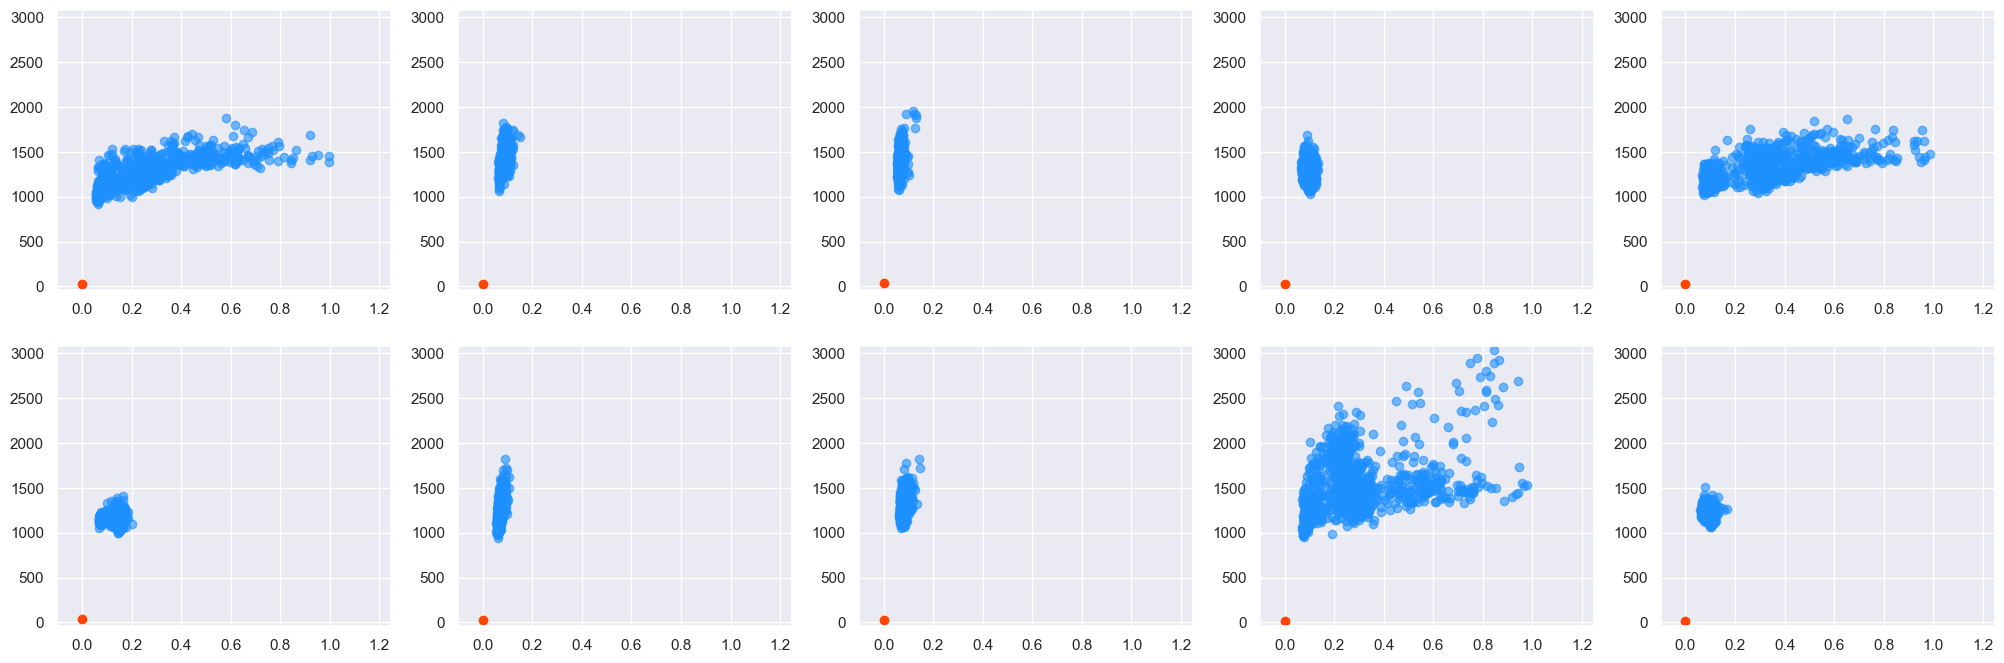

In [13]:

colors = list()
colors.append(mcolors.CSS4_COLORS["dodgerblue"])
colors.append(mcolors.CSS4_COLORS["orange"])
colors.append(mcolors.CSS4_COLORS["orangered"])

alpha_off = .2
alpha_on = .6

fig_file = Path(Path.home(), "Desktop/score_rmsd_correlation.png")
fig, axs = plt.subplots(2, 5, figsize=(25,8))

for i in range(10):
    custom_legend = list()
    custom_legend.append(Line2D([], [], marker='.', markersize=10, color=colors[0], linestyle='None'))
    custom_legend.append(Line2D([], [], marker='.', markersize=10, color=colors[1], linestyle='None'))

    ax = axs[i//5][i%5]
    ax.set_xlim(-.1,rmsd_max+.25)

    ax.set_ylim(ff_min-50,ff_max+50)
    ax.scatter(score_dfs[i]["rmsd_avg_0"], score_dfs[i]["ff"], c=colors[0], alpha=alpha_on)
    ax.scatter(natives_df.loc[i]["rmsd_avg_0"], natives_df.loc[i]["ff"], c=colors[2])

    # ax.set_ylim(score_min-.25,score_max+.25)
    # ax.scatter(score_dfs[i]["rmsd_avg_0"], score_dfs[i]["xray_0"], c=colors[0], alpha=alpha_on)
    # ax.scatter(natives_df.loc[i]["rmsd_avg_0"], natives_df.loc[i]["xray_0"], c=colors[2])

    # ax.set_ylim(score_min-.25,score_max+.25)
    # ax.scatter(score_dfs[i]["rmsd_avg_0"], score_dfs[i]["xray_0"]+score_dfs[i]["xray_1"], c=colors[0], alpha=alpha_on)
    # ax.scatter(natives_df.loc[i]["rmsd_avg_0"], natives_df.loc[i]["xray_0"]+natives_df.loc[i]["xray_1"], c=colors[2])

    # ax.set_ylim(0,.1)
    # ax.scatter(score_dfs[i]["rmsd_avg_0"], score_dfs[i]["r_free_0"], c=colors[0], alpha=alpha_on)
    # ax.scatter(natives_df.loc[i]["rmsd_avg_0"], natives_df.loc[i]["r_free_0"], c=colors[2])

# plt.show()
plt.savefig(fig_file)
